In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# <font color = 'red'> ЛР 4. Предварительная обработка признаков. Простейший линейный классификатор - логистическая регрессия. </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 10.10.2023

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Предварительная обработка признаков.  </font>

<font color = 'red' size = 5>Задание 1 </font>

1. Изучите примеры точечной работы с признаками в исходных данных из файла *LR4Pr_1(Features)*. 
2. Поработав в документацией и примерами проведите отбор и подготовку признаков из файла telecom.csv.
        2.1 Визуализируйте признаки.
        2.2 Удалите аномальные данные, где необходимо.
        2.3 Определите важные признаки с помощью описательной статитсики и корреляции.
        2.4 Заполните пропуски и поработайте с данными по своему усмотрению.
        2.5 Подготовленный датасет сохраните в новый csv файл.
        


[https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)


In [4]:
import warnings
warnings.filterwarnings("ignore") 

In [5]:
data = pd.read_csv('telecom_churn.csv')

In [6]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
print(data.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
data = data.drop(["phone number", "state", 'area code'], axis=1)

In [10]:
data['churn']=data['churn'].astype('int64')

In [11]:
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
d = {"no": 0, "yes": 1}
data["international plan"] = data["international plan"].map(d)
data["voice mail plan"] = data["voice mail plan"].map(d)

In [13]:
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [14]:
corr_matrix = data.drop("voice mail plan", axis = 1).corr()

In [15]:
corr_matrix

,account length,international plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,0.024735,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international plan,0.024735,1.000000,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
number vmail messages,-0.004628,0.008745,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.049396,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,0.003755,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.049398,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.019100,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,0.006114,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.019106,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.028905,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


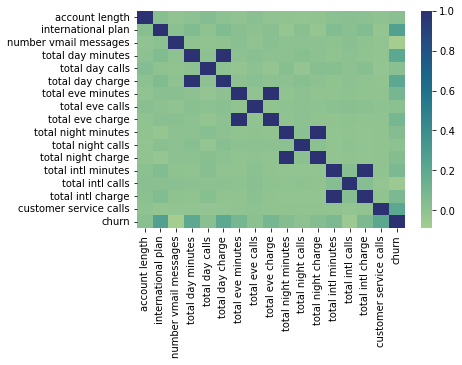

In [16]:
sns.heatmap(corr_matrix,cmap="crest");

In [17]:
data = data.drop(['total day charge',
                      'total eve charge', 'total night charge', 'total intl charge'], axis=1)

In [18]:
data

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0
3329,68,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
3330,28,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0
3331,184,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0


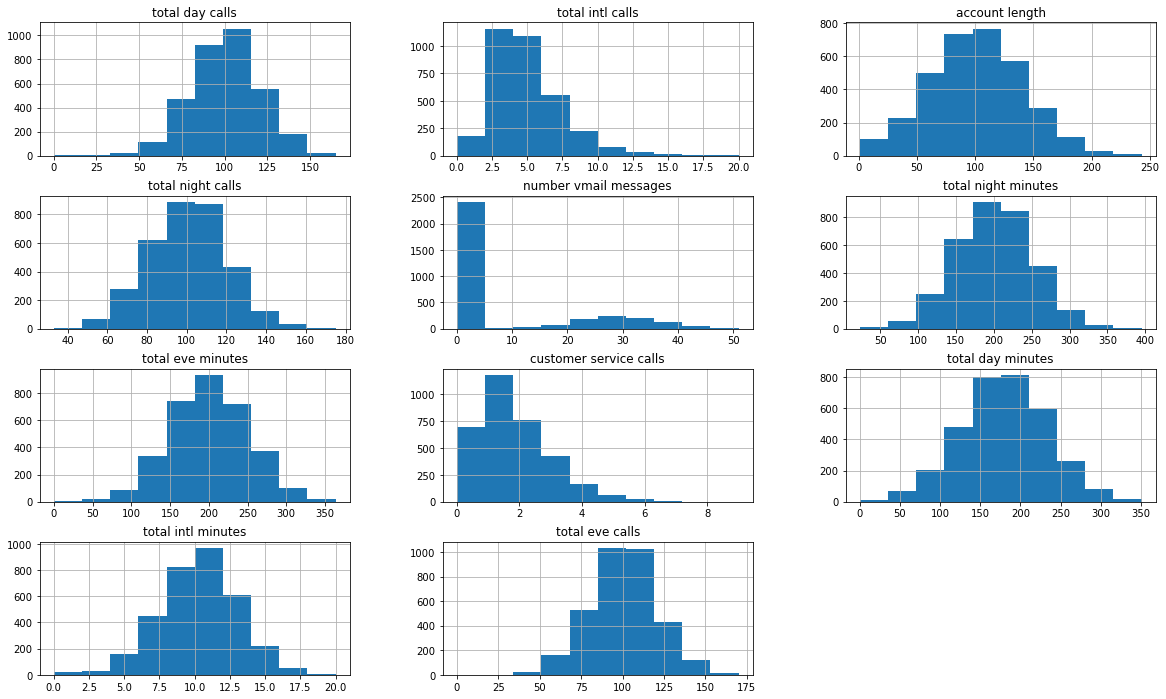

In [19]:
features = list(set(data.columns) - set(['international plan', 'voice mail plan',  'churn']))
data[features].hist(figsize=(20,12));

sns.pairplot(data[features + ['churn']], hue='churn');

In [20]:
data = data.drop('number vmail messages', axis = 1)

In [21]:
output_file = 'new_telecom.csv'
data.to_csv(output_file, index=False)

## <font color = 'green'> 2. Логистическая регрессия.  </font>

**Логистическая регрессия** - модель машинного обучения для линейной классификации данных. Основная идея состоит в вычислении вероятности попадания объекта в один из двух классов(в случае бинарной классификации) и последующей классификации этого объекта с помощью порога вероятности.

Общий алгоритм можно описать так. 

1. Вычисляем зачение функции-регрессора для заданной функции $reg = \overline{w}^{T}\overline{x}$.
2. Вычисляем вероятность попадания в класс "1"  $p_{1} = \frac{1}{1+e^{-reg}}$.
3. Классифицируем объект в класс "1" в случае если $p_{1}>0.5$ (хотя порог можно взять другим) и в класс "0" в противоположном случае.

Подробнее изучить можно в конспекте лекции и по [ссылке](https://habr.com/ru/articles/485872/).

[[ 12.61563938 -12.63844576]]


array([0.53737763])

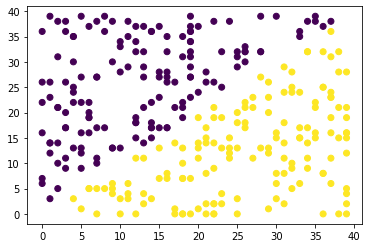

In [22]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0]-elem[1])==1) for elem in X_data])

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

inner_model = LogisticRegression(penalty='none')
inner_model.fit(X_data, y_data)

inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)
 # accuracy
(inner_preds == y_data).mean()

inner_preds_pr

print(inner_model.coef_)

inner_model.intercept_

<font color = 'red' size = 5>Задание 2 </font>

1. Реализуйте собственные методы для классификации данных методом логистической регрессии. Для минимизации функции потерь используйте градиентный спуск. 
2. Протестируйте ваш метод на искуственных данных. Сравните с работой встроенной функции. 
3. Графически изобразите результаты классификации. Изобразите разделяющую гиперплоскость или кривую.
4. Попробуйте подобрать данные, которые станут проблемой (покажут низкое качество на валидации) для описанной модели.

## 1

In [178]:
class myLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, threshold = 0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.threshold = threshold
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > self.threshold else 0 for i in y_predicted]
        return y_predicted_class
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [198]:
class myLogisticRegressionMinus:
    def __init__(self, learning_rate=0.01, num_iterations=1000, threshold = 0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.threshold = threshold
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(np.dot(linear_model.T, y))
            dw = (1 / num_samples) * np.dot(np.dot(X.T, y), y_predicted)
            db = (1 / num_samples) * np.sum(np.dot(y, y_predicted))
            
            self.weights += self.learning_rate * dw
            self.bias += self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = np.tanh(linear_model)
        y_predicted_class = [1 if i > self.threshold else -1 for i in y_predicted]
        return y_predicted_class
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

Моя реализация с классами -1, 1:  0.8620689655172413 
Веса:  [0.69685257 9.94191507]


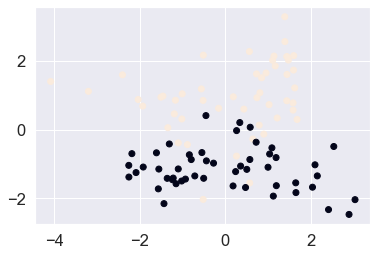

In [199]:
X_data, y_data = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=28)
y_data[y_data == 0] = -1

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.28, random_state=32)

model = myLogisticRegressionMinus()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Моя реализация с классами -1, 1: ", accuracy, "\nВеса: ", model.weights)

In [200]:
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=10000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=1)
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = myLogisticRegressionMinus()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.85      0.92      0.88      1511
           1       0.91      0.83      0.87      1489

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



## 2

Моя реализация с классами 0, 1:  0.896551724137931 
Веса:  [-0.05638959  1.61663324]
scikit-learn реализация:  0.896551724137931 
Веса:  [[-0.10100607  2.01257843]]


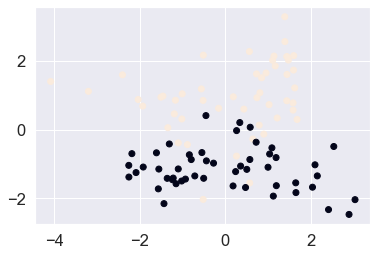

In [121]:
X_data, y_data = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=28)

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.28, random_state=32)

model = myLogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Моя реализация с классами 0, 1: ", accuracy, "\nВеса: ", model.weights)

sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)
sklearn_y_pred = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print("scikit-learn реализация: ", sklearn_accuracy, "\nВеса: ", sklearn_model.coef_)

## 3

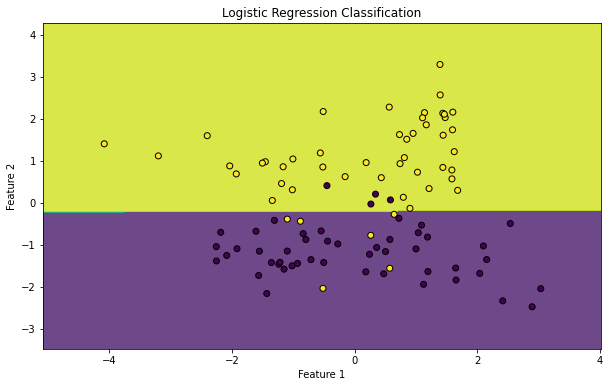

In [58]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=28)

model = LogisticRegression()
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Classification')
plt.show()


## 4

Точность = 0.3


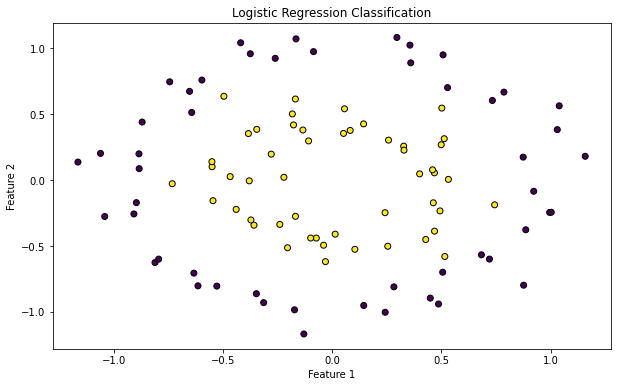

In [59]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность =", accuracy)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
#plt.contourf(xx, yy, Z, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Classification')
plt.show()


<font color = 'red' size = 5>Задание 3 </font>

Для каждого из подзаданий:

1. Проведите предварительную обработку данных.
2. Постройте модель классификации на основе метода логистической регрессии из встроенной библиотеки. 
3. Подберите оптимальные гиперпараметры модели используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей.
5. Используйте регуляризацию, где необходимо. Определите оптимальный коэффициент регуляризации. 
6. Оцените качество модели с помощью ROC-кривых.

[ROC](https://loginom.ru/blog/logistic-regression-roc-auc)


##### 3.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла [telecom.csv](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/code) для предсказания отказа от услуг связи. Столбец "churn". 
Предврительно изучите и подготовьте данные.

#####  3.2 Предсказание диабета у пациентов.

Используйте данные из файла [diabetes.csv](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 

#####  3.3 Данные теста микрочипов

Используйте данные из файла microchip_tests.txt для предсказания брака микрочипов. Предварительно изучите и подготовьте данные. 

## 3.1

In [1]:
data = pd.read_csv('new_telecom.csv')

NameError: name 'pd' is not defined

In [2]:
y = data['churn']
data = data.drop(['churn'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

NameError: name 'data' is not defined

In [ ]:
poly = PolynomialFeatures(degree=3) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.28,
random_state=28)

model_2 = LogisticRegression(solver='sag')
model_2.fit(X_train,y_train)

pred = model_2.predict(X_test)

accurancy = metrics.accuracy_score(y_test, pred)
accurancy

In [ ]:
degrees = list(range(2,6))
scores_test = []

for i in degrees:
    poly = PolynomialFeatures(degree=i) 
    scaled_data_1 = poly.fit_transform(scaled_data)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,random_state=28)
    model = LogisticRegression(solver='sag')
    model.fit(X_train, y_train)
    
    pred_proba = model.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores_test.append(auc)
    

plt.plot(degrees, scores_test, 'b-o', label='Test')
plt.legend()
plt.xlabel('Степень PolynomialFeatures')
plt.ylabel('auc')
plt.title('Влияние степени PolynomialFeatures на результат работы модели')
plt.show()

In [ ]:
alphas = np.logspace(-5, 5, 20)
scores_test = []

poly = PolynomialFeatures(degree=3) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,random_state=28)
    
for alpha in alphas:
    reg = LogisticRegression(C=alpha)
    reg.fit(X_train, y_train)

    pred_proba = reg.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores_test.append(auc)
    
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), scores_test, 'b-o', label='Test')
plt.legend()
plt.xlabel('log10(alpha)')
plt.ylabel('auc')
plt.title('Влияние регуляризации на результат работы модели')
plt.show()

In [ ]:
ratios = np.linspace(0,1,20)
scores = []


for ratio in ratios:
    model = LogisticRegression(C=0.01, l1_ratio=ratio)
    model.fit(X_train, y_train)
    pred_proba = model.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores.append(auc)

plt.figure(figsize=(10, 6))
plt.plot(ratios, scores, 'b-o')
plt.xlabel('l1_ratio')
plt.ylabel('auc')
plt.title('Влияние параметра l1_ratio на результат работы модели')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=3) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.28,random_state=28)
model = LogisticRegression(C=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
print(f"R2: {r2}")

In [ ]:
pred_proba = model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, pred_proba)
auc

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(8, 6))

pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## 3.2

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data

In [ ]:
col_idx = data.columns
print(col_idx)

In [ ]:
data.dtypes

In [ ]:
corr_matrix = data.corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix,cmap="crest");

In [ ]:
data["SkinThickness"] = data["SkinThickness"].replace(0, np.NaN)
data["Insulin"] = data["Insulin"].replace(0, np.NaN)
data["BMI"] = data["BMI"].replace(0, np.NaN)

In [ ]:
medians = data.median() 
data = data.fillna(medians)

In [ ]:
y = data['Outcome']
data = data.drop(['Outcome'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

In [ ]:
poly = PolynomialFeatures(degree=3) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,
random_state=28)

model_2 = LogisticRegression(solver='sag')
model_2.fit(X_train,y_train)

pred = model_2.predict(X_test)

accurancy = metrics.accuracy_score(y_test, pred)
accurancy

In [ ]:
degrees = list(range(1,6))
scores_test = []

for i in degrees:
    poly = PolynomialFeatures(degree=i) 
    scaled_data_1 = poly.fit_transform(scaled_data)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,random_state=28)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    pred_proba = model.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores_test.append(auc)
    

plt.plot(degrees, scores_test, 'b-o', label='Test')
plt.legend()
plt.xlabel('Степень PolynomialFeatures')
plt.ylabel('auc')
plt.title('Влияние степени PolynomialFeatures на результат работы модели')
plt.show()

In [ ]:
alphas = np.logspace(-5, 5, 20)
scores_test = []

poly = PolynomialFeatures(degree=2) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,random_state=28)
    
for alpha in alphas:
    reg = LogisticRegression(C=alpha)
    reg.fit(X_train, y_train)
    
    pred_proba = reg.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores_test.append(auc)

plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), scores_test, 'b-o', label='Test')
plt.legend()
plt.xlabel('log10(alpha)')
plt.ylabel('auc')
plt.title('Влияние регуляризации на результат работы модели')
plt.show()

In [ ]:
ratios = np.linspace(0,1,20)
scores = []


for ratio in ratios:
    model = LogisticRegression(C=1000, l1_ratio=ratio)
    model.fit(X_train, y_train)
    pred_proba = model.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores.append(auc)

plt.figure(figsize=(10, 6))
plt.plot(ratios, scores, 'b-o')
plt.xlabel('l1_ratio')
plt.ylabel('auc')
plt.title('Влияние параметра l1_ratio на результат работы модели')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.28,random_state=28)
model = LogisticRegression(C=1000, solver = "sag")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
print(f"R2: {r2}")

In [ ]:
pred_proba = model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, pred_proba)
auc

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(8, 6))

pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## 3.3

In [201]:
data = pd.read_csv(
    "microchip_tests.txt",
    header=None,
    names=("test1", "test2", "outcome"))

In [202]:
data

,test1,test2,outcome
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [203]:
data.dtypes

test1      float64
test2      float64
outcome      int64
dtype: object

In [204]:
corr_matrix = data.corr()
corr_matrix

,test1,test2,outcome
test1,1.000000,-0.138709,-0.074115
test2,-0.138709,1.000000,0.005697
outcome,-0.074115,0.005697,1.000000


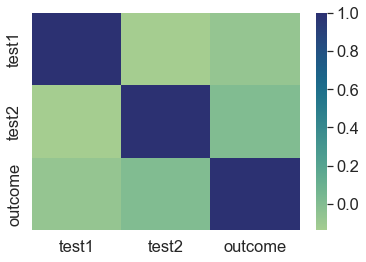

In [205]:
sns.heatmap(corr_matrix,cmap="crest");

In [206]:
y = data['outcome']
data = data.drop(['outcome'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

In [207]:
poly = PolynomialFeatures(degree=3) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,
random_state=28)

model_2 = LogisticRegression(solver='sag')
model_2.fit(X_train,y_train)

pred = model_2.predict(X_test)

accurancy = metrics.accuracy_score(y_test, pred)
accurancy

0.75

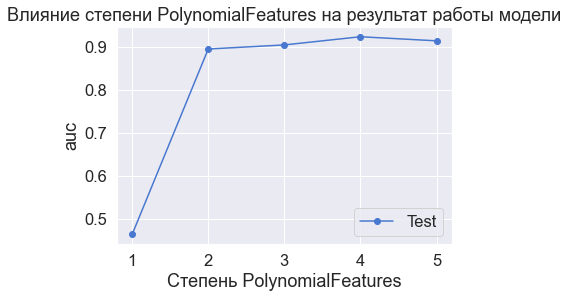

In [208]:
degrees = list(range(1,6))
scores_test = []

for i in degrees:
    poly = PolynomialFeatures(degree=i) 
    scaled_data_1 = poly.fit_transform(scaled_data)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,random_state=28)
    model = LogisticRegression(solver='sag')
    model.fit(X_train, y_train)
    pred_proba = model.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores_test.append(auc)

plt.plot(degrees, scores_test, 'b-o', label='Test')
plt.legend()
plt.xlabel('Степень PolynomialFeatures')
plt.ylabel('auc')
plt.title('Влияние степени PolynomialFeatures на результат работы модели')
plt.show()

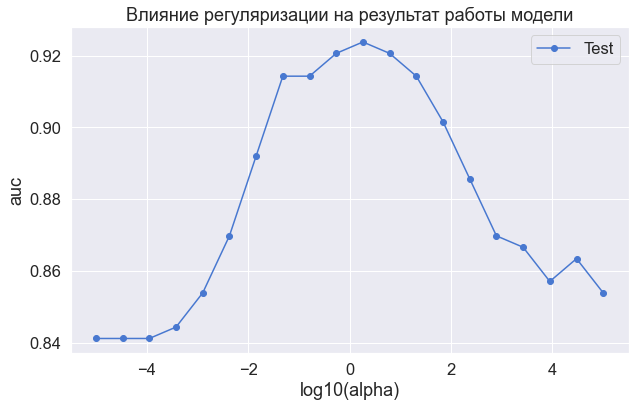

In [209]:
alphas = np.logspace(-5, 5, 20)
scores_test = []

poly = PolynomialFeatures(degree=4) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.3,random_state=28)
    
for alpha in alphas:
    reg = LogisticRegression(C=alpha)
    reg.fit(X_train, y_train)
    pred_proba = reg.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores_test.append(auc)

plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), scores_test, 'b-o', label='Test')
plt.legend()
plt.xlabel('log10(alpha)')
plt.ylabel('auc')
plt.title('Влияние регуляризации на результат работы модели')
plt.show()

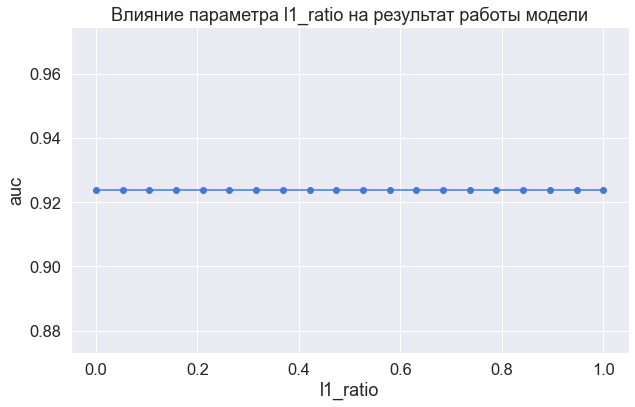

In [210]:
ratios = np.linspace(0,1,20)
scores = []


for ratio in ratios:
    model = LogisticRegression(C=1, l1_ratio=ratio)
    model.fit(X_train, y_train)
    pred_proba = model.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, pred_proba)
    scores.append(auc)

plt.figure(figsize=(10, 6))
plt.plot(ratios, scores, 'b-o')
plt.xlabel('l1_ratio')
plt.ylabel('auc')
plt.title('Влияние параметра l1_ratio на результат работы модели')
plt.show()

In [211]:
poly = PolynomialFeatures(degree=4) 
scaled_data_1 = poly.fit_transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data_1, y, test_size=0.28,random_state=28)
model = LogisticRegression(C=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
print(f"R2: {r2}")

R2: 0.7647058823529411


In [212]:
pred_proba = model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, pred_proba)
auc

0.9228070175438597

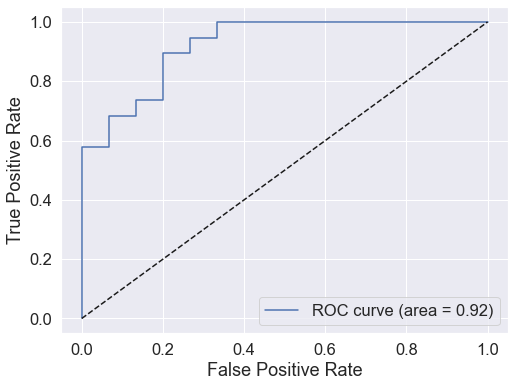

In [213]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(8, 6))

pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()